# Vizdoom Defend Center

In [ ]:
!pip install vizdoom

In [ ]:
!cd github & git clone https://github.com/mwydmuch/ViZDoom

In [ ]:
import sys
print(sys.path)
sys.path.append('C:\\Users\\joshu\\anaconda3\\lib\\site-packages\\vizdoom')
print(sys.path)

### Get vizdoom running

In [1]:
#import vizoom for game environment
from vizdoom import *

# Import rand
import random

# Import time for sleeping
import time

# Import for identity matrix
import numpy as np

In [2]:
# setup game
game = DoomGame()
game.load_config('../../s22-team5-project/env/basic.cfg')
game.init()

In [4]:
# Actions we can take in the env
actions = np.identity(3, dtype=np.uint8)

In [5]:
# move left, move right, attack
actions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [6]:
episodes = 3
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer # gets each image frame
        info = state.game_variables # amounts to ammo in this map
        reward = game.make_action(random.choice(actions),4) # frame skip so that the agent can see what he did
        print('reward: ', reward)
        time.sleep(0.02)
    print('result: ', game.get_total_reward())
    time.sleep(2)

reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  99.0
result:  71.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  99.0
result:  87.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  99.0
result:  -142.0


In [7]:
game.close()

### Connect to OpenAI Gym

In [ ]:
!pip install gym

import **Spacers**: the way we define shapes within the environment
- box: arrays of any shape  
- discrete: set of discrete binary actions

In [8]:
# Import env base class from openAI gym
from gym import Env

# Import gym spaces
from gym.spaces import Discrete, Box

# Import opencv
import cv2

In [9]:
obsv_shape = game.get_state().screen_buffer.shape
obsv_shape

AttributeError: 'NoneType' object has no attribute 'screen_buffer'

In [10]:
actions.shape

(3, 3)

In [20]:
# Create vizdoom OpenAI Gym Environment
class VizDoomGym(Env):
    # function that is called at start of env
    def __init__(self, render=False):
        # Inherit from Env
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('../../s22-team5-project/env/basic.cfg')
        
        # Choose whether or not to render each frame
        self.game.set_window_visible(render)
        self.game.init()
        
        # Create the obsv and action space
        self.observation_space = Box(low=0, high=255, 
                                     shape=(100,160,1), 
                                     dtype=np.uint8)
        self.action_space = Discrete(actions.shape[0])
    
    # How we take a step in the env
    def step(self, action):
        # Specify action and take step
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 4)
        
        # Get the other stuff
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
        else:
            state = np.zeros(self.observation_space.shape)
            ammo = 0
        
        info = {"ammo":ammo}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info
    
    # Predefined in Vizdoom, how to render the game
    def render():
        pass
    
    # What happens when we start a new game
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the frame and resize
    def grayscale(self, observation):
        # moves the color channels to the end of the shape
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY) 
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
        
    # Call to close down the game
    def close(self):
        self.game.close()

In [22]:
env = VizDoomGym(render=True)

In [23]:
state = env.reset()

In [ ]:
state = env.step(0)

In [21]:
env.close()

In [18]:
# Import Env checker
from stable_baselines3.common import env_checker

In [24]:
env_checker.check_env(env)

### View environment view state
Need matplot in order to see the grayscaled frames

In [35]:
!pip install matplotlib

In [25]:
from matplotlib import pyplot as plt

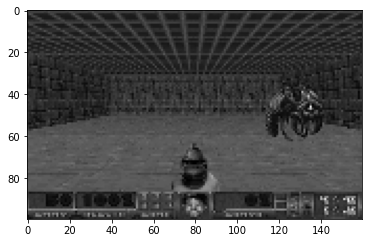

In [26]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [27]:
env.close()

### Setup Callback

In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [ ]:
!pip install stable-baselines3[extra]

In [28]:
# Import os for file navigation
import os

# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [29]:
# This class was taken from Nicholas Renotte for backing-up a model during training
#     (It is optional and is not needed to run the model)
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
                                                                             
        return True

In [30]:
CHECKPOINT_DIR = './train/train_basic2'
LOG_DIR = './logs/log_basic2'

In [31]:
callback = TrainAndLoggingCallback(check_freq=10000, 
                                   save_path=CHECKPOINT_DIR)

### Training time baby

In [32]:
# Import ppo for training (RLA)
from stable_baselines3 import PPO

In [33]:
# Non-rendered environment
env = VizDoomGym()

In [36]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1,
            learning_rate=0.0001, n_steps=2048)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [37]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic2\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.9     |
|    ep_rew_mean     | -78.1    |
| time/              |          |
|    fps             | 11       |
|    iterations      | 1        |
|    time_elapsed    | 180      |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31          |
|    ep_rew_mean          | -71.6       |
| time/                   |             |
|    fps                  | 10          |
|    iterations           | 2           |
|    time_elapsed         | 373         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012765203 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.000262 

### Test the Model

In [39]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [44]:
# Load model from disk
model = PPO.load('./train/train_basic2/best_model_100000')

In [42]:
env = VizDoomGym(render=True)

In [ ]:
# Evaluate mean reward for some games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

In [ ]:
mean_reward

In [46]:
for episode in range(3):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        time.sleep(0.05)
        total_reward += reward
    print('Total reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total reward for episode 0 is 95.0
Total reward for episode 1 is 95.0
Total reward for episode 2 is 95.0


In [47]:
env.close()